<center><h1> Graph Analysis and Graph Learning </h1></center>
<center> An introduction using `networkx`</center>

# I. Import

In [128]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
%matplotlib inline
from sklearn import metrics
import os.path
import urllib
import tarfile

You can access NetworkX documentation [here](http://networkx.readthedocs.io/)

# II. Basic of graphs

## 1. Load and plot

In [3]:
G_karate = nx.karate_club_graph()

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


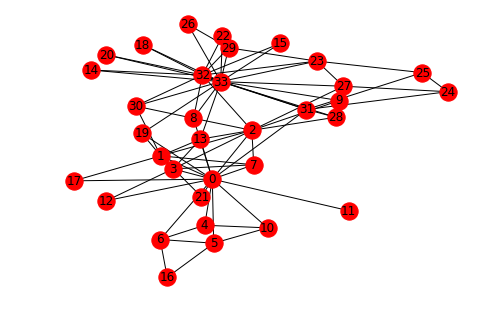

In [4]:
pos = nx.spring_layout(G_karate)
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

## 2. Describe the graph

In [5]:
n=34

In [6]:
G_karate.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [7]:
degree_sequence = list(G_karate.degree())

In [8]:
nb_nodes = n
nb_arr = len(G_karate.edges())

avg_degree = np.mean(np.array(degree_sequence)[:,1])
med_degree = np.median(np.array(degree_sequence)[:,1])

max_degree = max(np.array(degree_sequence)[:,1])
min_degree = np.min(np.array(degree_sequence)[:,1])

In [9]:
print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))

print("Maximum degree : " + str(max_degree))
print("Minimum degree : " + str(min_degree))

print("Average degree : " + str(avg_degree))
print("Median degree : " + str(med_degree))

Number of nodes : 34
Number of edges : 78
Maximum degree : 17
Minimum degree : 1
Average degree : 4.588235294117647
Median degree : 3.0


More visually, we can plot the histogram of the sequence of degrees :

In [10]:
degree_freq = np.array(nx.degree_histogram(G_karate)).astype('float')

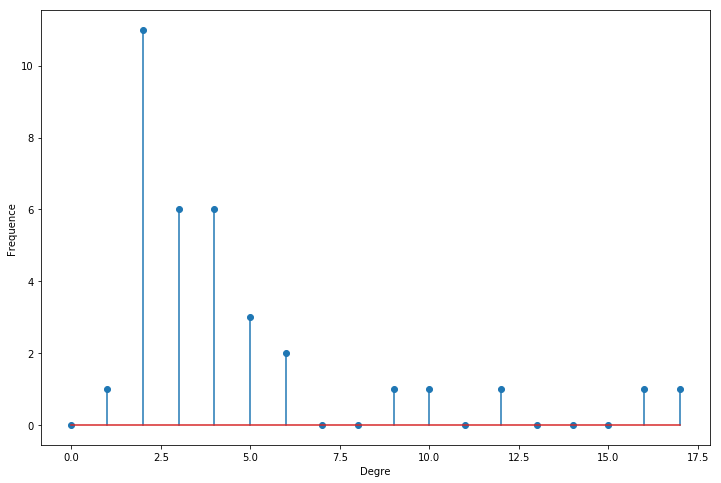

In [11]:
plt.figure(figsize=(12, 8))
plt.stem(degree_freq)
plt.ylabel("Frequence")
plt.xlabel("Degre")
plt.show()

# III. Graph Analysis

## 1. Erdős-Rényi

### Build the graph

In [12]:
n = 200
p = 0.2
G_erdos = nx.erdos_renyi_graph(n,p, seed =100)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


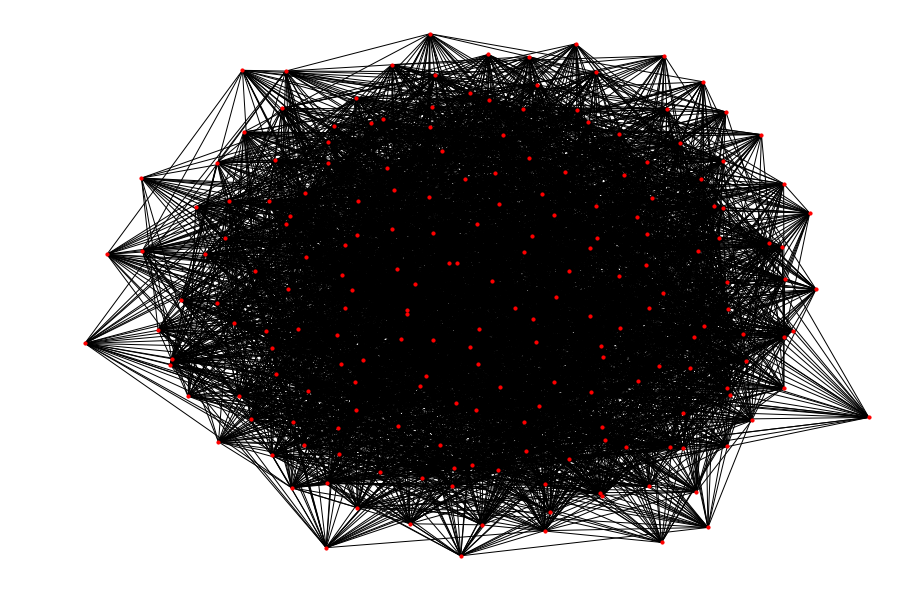

In [13]:
plt.figure(figsize=(12,8))
nx.draw(G_erdos, node_size=10)

### Degree Distribution

In [14]:
degree_freq = np.array(nx.degree_histogram(G_erdos)).astype('float')

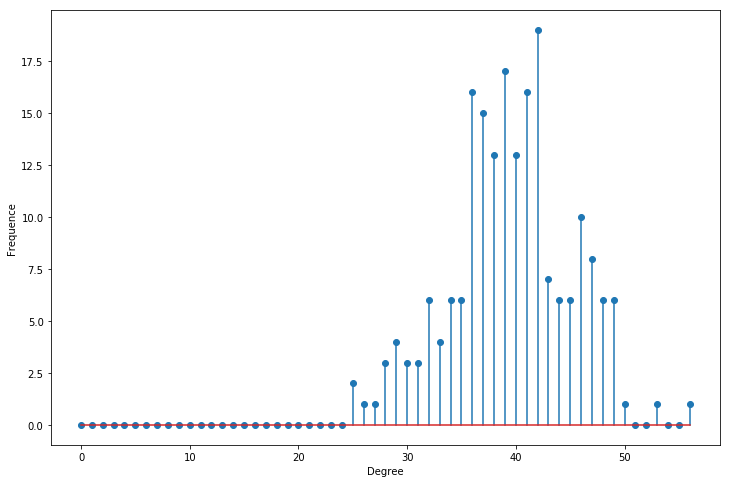

In [15]:
plt.figure(figsize=(12, 8))
plt.stem(degree_freq)
plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.show()

### Descriptive statistics

In [16]:
degree_sequence_erdos = list(G_erdos.degree())

nb_nodes = n
nb_arr = len(G_erdos.edges())

avg_degree = np.mean(np.array(degree_sequence_erdos)[:,1])
med_degree = np.median(np.array(degree_sequence_erdos)[:,1])

max_degree = max(np.array(degree_sequence_erdos)[:,1])
min_degree = np.min(np.array(degree_sequence_erdos)[:,1])

esp_degree = (n-1)*p

print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))

print("Maximum degree : " + str(max_degree))
print("Minimum degree : " + str(min_degree))

print("Average degree : " + str(avg_degree))
print("Expected degree : " + str(esp_degree))
print("Median degree : " + str(med_degree))

Number of nodes : 200
Number of edges : 3949
Maximum degree : 56
Minimum degree : 25
Average degree : 39.49
Expected degree : 39.800000000000004
Median degree : 39.5


## 2. Barabasi-Albert

### Build the graph

In [17]:
n = 150
m = 3
G_barabasi = nx.barabasi_albert_graph(n,m)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


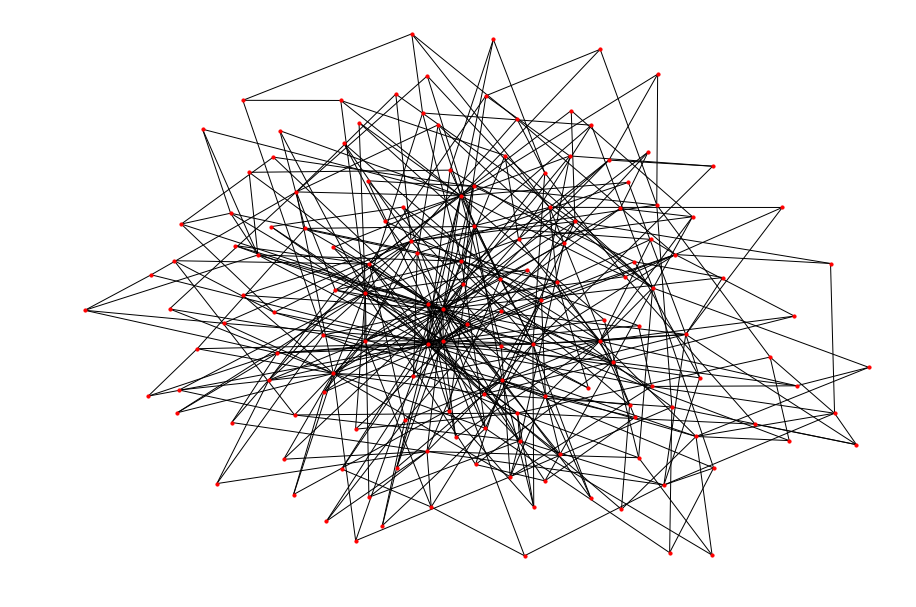

In [18]:
plt.figure(figsize=(12,8))
nx.draw(G_barabasi, node_size=10)

### Degree Distribution

In [19]:
degree_freq = np.array(nx.degree_histogram(G_barabasi)).astype('float')

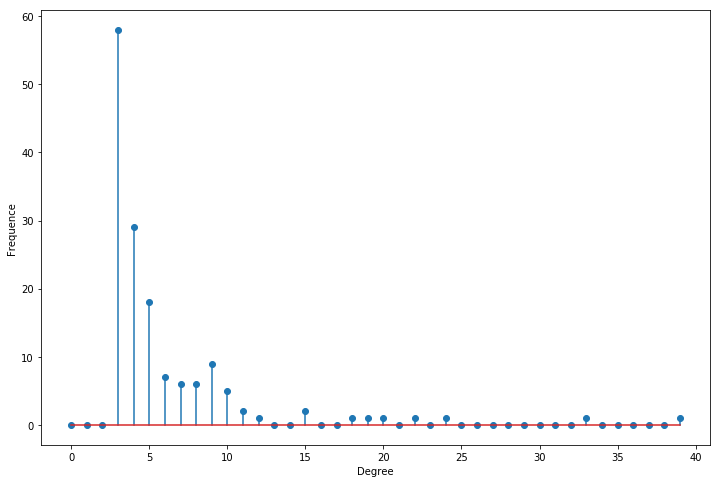

In [20]:
plt.figure(figsize=(12, 8))
plt.stem(degree_freq)
plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.show()

### Descriptive statistics

In [21]:
degree_sequence_barabasi = list(G_barabasi.degree())

nb_nodes = n
nb_arr = len(G_barabasi.edges())

avg_degree = np.mean(np.array(degree_sequence_barabasi)[:,1])
med_degree = np.median(np.array(degree_sequence_barabasi)[:,1])

max_degree = max(np.array(degree_sequence_barabasi)[:,1])
min_degree = np.min(np.array(degree_sequence_barabasi)[:,1])

print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))

print("Maximum degree : " + str(max_degree))
print("Minimum degree : " + str(min_degree))

print("Average degree : " + str(avg_degree))
print("Median degree : " + str(med_degree))

Number of nodes : 150
Number of edges : 441
Maximum degree : 39
Minimum degree : 3
Average degree : 5.88
Median degree : 4.0


## 3. Clustering Coefficient

In [22]:
# Local Clustering Coefficients
list(nx.clustering(G_barabasi).values())

[0.05263157894736842,
 0.1111111111111111,
 0.1111111111111111,
 0.06818181818181818,
 0.048582995951417005,
 0.02631578947368421,
 0.06493506493506493,
 0.1111111111111111,
 0.06159420289855073,
 0.4,
 0.1111111111111111,
 0.17857142857142858,
 0.13333333333333333,
 0,
 0.13333333333333333,
 0.14285714285714285,
 0.06666666666666667,
 0.14285714285714285,
 0.16666666666666666,
 0.05555555555555555,
 0.07142857142857142,
 0.02857142857142857,
 0.08333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.027777777777777776,
 0.05555555555555555,
 0.08333333333333333,
 0.044444444444444446,
 0.047619047619047616,
 0,
 0.044444444444444446,
 0.045454545454545456,
 0.08888888888888889,
 0,
 0,
 0.07272727272727272,
 0.16666666666666666,
 0.03571428571428571,
 0.07142857142857142,
 0.13333333333333333,
 0.1,
 0.4,
 0.2,
 0.09523809523809523,
 0.09523809523809523,
 0.2,
 0.05454545454545454,
 0.047619047619047616,
 0,
 0.047619047619047616,
 0.3333333333333333,
 0.2,
 0.1666666666666666

In [23]:
# Global Clustering Coefficient
print("Global Clustering Coefficient : " + str(np.mean(list(nx.clustering(G_barabasi).values()))))

Global Clustering Coefficient : 0.10480772799537101


# IV. Graph Algorithms

We'll now use the Karate Club graph integrated in `networkx`. It represents the relations of members of a Karate Club. However, due to a lack a agreement of the founders of the club, the club has recently been splitted in two. We'll try to illustrate this event with graphs. 


#### Graphe Karate Club

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


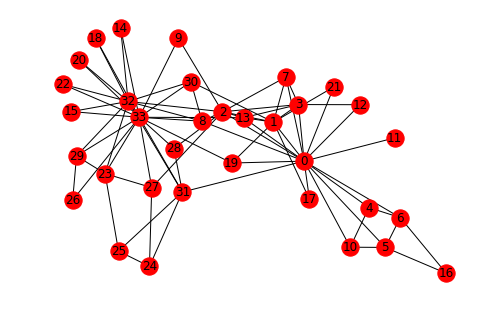

In [24]:
n=34
m = 78
G_karate = nx.karate_club_graph()

pos = nx.spring_layout(G_karate)
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

## 1. Pathfinding

#### Shortest Path

In [25]:
# Returns shortest path between each node
nx.shortest_path(G_karate)

{0: {0: [0],
  1: [0, 1],
  2: [0, 2],
  3: [0, 3],
  4: [0, 4],
  5: [0, 5],
  6: [0, 6],
  7: [0, 7],
  8: [0, 8],
  9: [0, 2, 9],
  10: [0, 10],
  11: [0, 11],
  12: [0, 12],
  13: [0, 13],
  14: [0, 2, 32, 14],
  15: [0, 2, 32, 15],
  16: [0, 5, 16],
  17: [0, 17],
  18: [0, 2, 32, 18],
  19: [0, 19],
  20: [0, 2, 32, 20],
  21: [0, 21],
  22: [0, 2, 32, 22],
  23: [0, 2, 27, 23],
  24: [0, 31, 24],
  25: [0, 31, 25],
  26: [0, 8, 33, 26],
  27: [0, 2, 27],
  28: [0, 2, 28],
  29: [0, 2, 32, 29],
  30: [0, 1, 30],
  31: [0, 31],
  32: [0, 2, 32],
  33: [0, 8, 33]},
 1: {0: [1, 0],
  1: [1],
  2: [1, 2],
  3: [1, 3],
  4: [1, 0, 4],
  5: [1, 0, 5],
  6: [1, 0, 6],
  7: [1, 7],
  8: [1, 0, 8],
  9: [1, 2, 9],
  10: [1, 0, 10],
  11: [1, 0, 11],
  12: [1, 0, 12],
  13: [1, 13],
  14: [1, 2, 32, 14],
  15: [1, 2, 32, 15],
  16: [1, 0, 5, 16],
  17: [1, 17],
  18: [1, 2, 32, 18],
  19: [1, 19],
  20: [1, 2, 32, 20],
  21: [1, 21],
  22: [1, 2, 32, 22],
  23: [1, 2, 27, 23],
  24: [1, 0,

#### All Pairs Shortest Path

In [26]:
# Returns shortest path length between each node
list(nx.all_pairs_shortest_path_length(G_karate))

[(0,
  {0: 0,
   1: 1,
   2: 1,
   3: 1,
   4: 1,
   5: 1,
   6: 1,
   7: 1,
   8: 1,
   9: 2,
   10: 1,
   11: 1,
   12: 1,
   13: 1,
   14: 3,
   15: 3,
   16: 2,
   17: 1,
   18: 3,
   19: 1,
   20: 3,
   21: 1,
   22: 3,
   23: 3,
   24: 2,
   25: 2,
   26: 3,
   27: 2,
   28: 2,
   29: 3,
   30: 2,
   31: 1,
   32: 2,
   33: 2}),
 (1,
  {0: 1,
   1: 0,
   2: 1,
   3: 1,
   4: 2,
   5: 2,
   6: 2,
   7: 1,
   8: 2,
   9: 2,
   10: 2,
   11: 2,
   12: 2,
   13: 1,
   14: 3,
   15: 3,
   16: 3,
   17: 1,
   18: 3,
   19: 1,
   20: 3,
   21: 1,
   22: 3,
   23: 3,
   24: 3,
   25: 3,
   26: 3,
   27: 2,
   28: 2,
   29: 3,
   30: 1,
   31: 2,
   32: 2,
   33: 2}),
 (2,
  {0: 1,
   1: 1,
   2: 0,
   3: 1,
   4: 2,
   5: 2,
   6: 2,
   7: 1,
   8: 1,
   9: 1,
   10: 2,
   11: 2,
   12: 2,
   13: 1,
   14: 2,
   15: 2,
   16: 3,
   17: 2,
   18: 2,
   19: 2,
   20: 2,
   21: 2,
   22: 2,
   23: 2,
   24: 2,
   25: 3,
   26: 3,
   27: 1,
   28: 1,
   29: 2,
   30: 2,
   31: 2,
   32: 1,
 

#### Minimum Weight Spanning Tree

In [27]:
from networkx.algorithms import tree
mst = tree.minimum_spanning_edges(G_karate, algorithm='prim', data=False)
edgelist = list(mst)
sorted(edgelist)

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 17),
 (0, 19),
 (0, 21),
 (0, 31),
 (1, 30),
 (2, 9),
 (2, 27),
 (2, 28),
 (2, 32),
 (5, 16),
 (8, 33),
 (27, 23),
 (31, 24),
 (31, 25),
 (32, 14),
 (32, 15),
 (32, 18),
 (32, 20),
 (32, 22),
 (32, 29),
 (33, 26)]

## 2. Community Detection

#### Connected Components

In [35]:
nx.is_connected(G_karate)

True

#### Hierarchical Clustering

Then, before applying hierachical clustering, we need to define the matrix of distances between each node.

In [29]:
# distances[i, j] is the length of the shortest path between i and j
pcc_longueurs=list(nx.all_pairs_shortest_path_length(G_karate))
distances=np.zeros((n,n))

for i in range(n):
    for j in range(n):
        distances[i, j] = pcc_longueurs[i][1][j]

In [30]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(distances)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


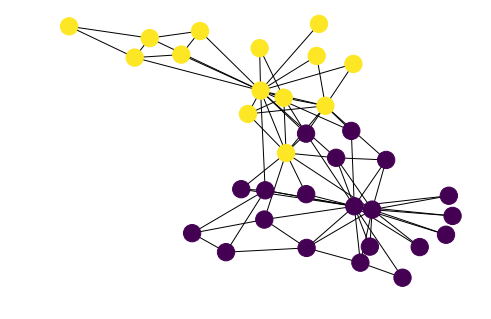

In [31]:
nx.draw(G_karate,  node_color = clustering)

## 3. Centrality measures

In [32]:
c_degree = nx.degree_centrality(G_karate)
c_eigenvector = nx.eigenvector_centrality(G_karate)
c_closeness = nx.closeness_centrality(G_karate)
c_betweenness = nx.betweenness_centrality(G_karate)

In [33]:
c_degree = list(c_degree.values())
c_eigenvector = list(c_eigenvector.values())
c_closeness = list(c_closeness.values())
c_betweenness = list(c_betweenness.values())

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


Text(0.5, 1.0, 'Betweenness Centrality')

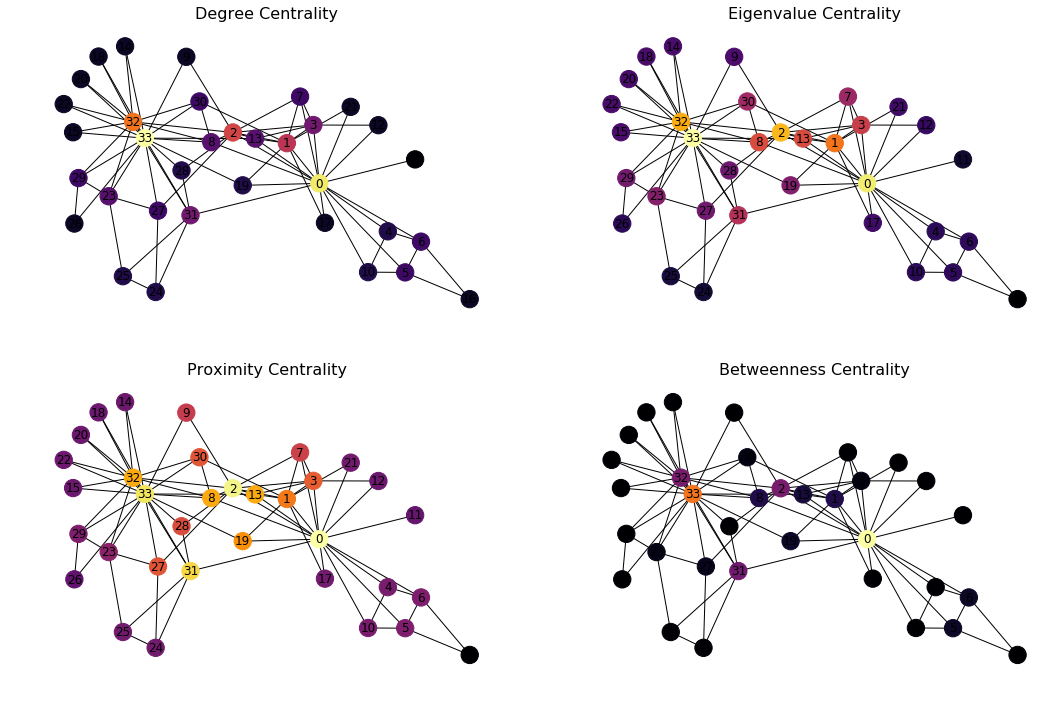

In [34]:
plt.figure(figsize=(18, 12))
f, axarr = plt.subplots(2, 2, num=1)
plt.sca(axarr[0,0])
nx.draw(G_karate, cmap = plt.get_cmap('inferno'), node_color = c_degree, node_size=300, pos=pos, with_labels=True)
axarr[0,0].set_title('Degree Centrality', size=16)

plt.sca(axarr[0,1])
nx.draw(G_karate, cmap = plt.get_cmap('inferno'), node_color = c_eigenvector, node_size=300, pos=pos, with_labels=True)
axarr[0,1].set_title('Eigenvalue Centrality', size=16)

plt.sca(axarr[1,0])
nx.draw(G_karate, cmap = plt.get_cmap('inferno'), node_color = c_closeness, node_size=300, pos=pos, with_labels=True)
axarr[1,0].set_title('Proximity Centrality', size=16)

plt.sca(axarr[1,1])
nx.draw(G_karate, cmap = plt.get_cmap('inferno'), node_color = c_betweenness, node_size=300, pos=pos, with_labels=True)
axarr[1,1].set_title('Betweenness Centrality', size=16)

# V. Graph Learning

## 1. Link prediction

In [4]:
n = G_karate.number_of_nodes()
m = G_karate.number_of_edges()

In [5]:
print("Number of nodes : %d" % n)
print("Number of edges : %d" % m)
print("Number of connected components : %d" % nx.number_connected_components(G_karate))

Number of nodes : 34
Number of edges : 78
Number of connected components : 1


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


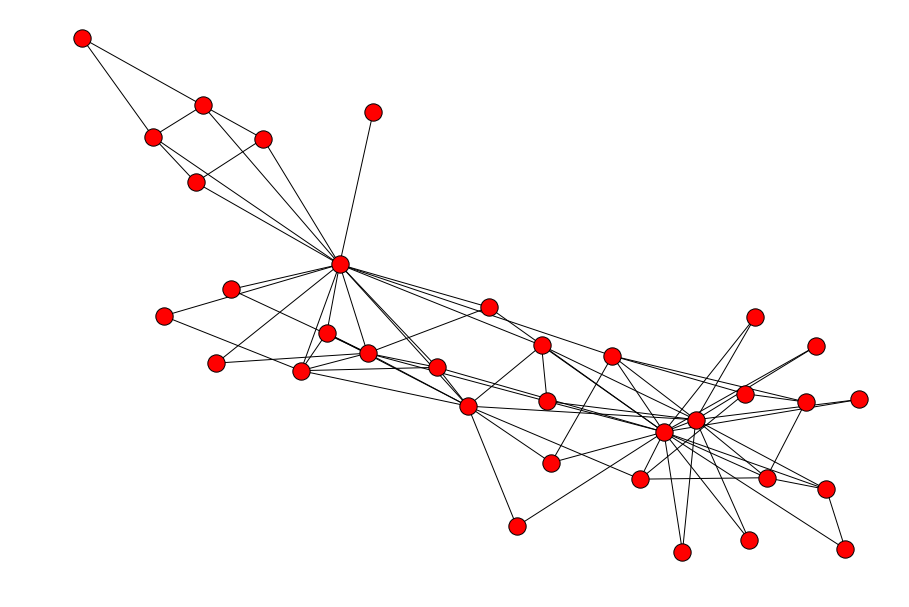

In [6]:
plt.figure(figsize=(12,8))
nx.draw(G_karate)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black

Now, let's remove some of the connections :

In [35]:
proportion_edges = 0.15
edge_subset = random.sample(G_karate.edges(), int(proportion_edges * G_karate.number_of_edges()))

In [36]:
G_karate_train = G_karate.copy()
G_karate_train.remove_edges_from(edge_subset)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


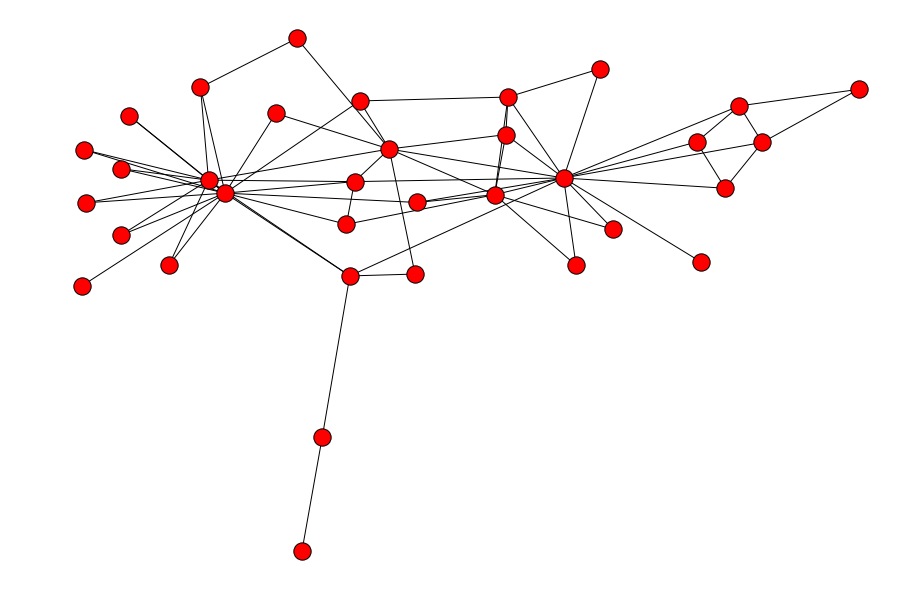

In [37]:
plt.figure(figsize=(12,8))
nx.draw(G_karate_train)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black

In [38]:
edge_subset_size = len(list(edge_subset))
print("Number of edges deleted : %d" % edge_subset_size)
print("Number of edges remaining : %d" % (m - edge_subset_size))

Number of edges deleted : 11
Number of edges remaining : 67


In [39]:
nb_non_exist = n * (n-1) / 2 - (m - edge_subset_size)
nb_non_exist

494.0

We'll now try to predict the missing links in the Karate graph using the Jaccard Coefficient, the Adamic Adar index and the Preferential Attachement. We'll perform the evaluation by Area Under the Curve (AUC).

### a. Jaccard Coefficient

In [40]:
# Make prediction using Jaccard Coefficient
pred_jaccard = list(nx.jaccard_coefficient(G_karate_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_jaccard])

In [41]:
pred_jaccard

[(0, 32, 0.13043478260869565),
 (0, 33, 0.1111111111111111),
 (0, 9, 0.0625),
 (0, 13, 0.125),
 (0, 14, 0.0),
 (0, 15, 0.0),
 (0, 16, 0.13333333333333333),
 (0, 18, 0.0),
 (0, 20, 0.0),
 (0, 22, 0.0),
 (0, 23, 0.0),
 (0, 24, 0.0625),
 (0, 25, 0.0),
 (0, 26, 0.0),
 (0, 27, 0.0625),
 (0, 28, 0.13333333333333333),
 (0, 29, 0.0),
 (0, 30, 0.125),
 (1, 4, 0.1),
 (1, 5, 0.09090909090909091),
 (1, 6, 0.09090909090909091),
 (1, 8, 0.3),
 (1, 9, 0.1111111111111111),
 (1, 10, 0.1),
 (1, 11, 0.125),
 (1, 12, 0.25),
 (1, 13, 0.2222222222222222),
 (1, 14, 0.0),
 (1, 15, 0.0),
 (1, 16, 0.0),
 (1, 18, 0.0),
 (1, 20, 0.0),
 (1, 22, 0.0),
 (1, 23, 0.0),
 (1, 24, 0.0),
 (1, 25, 0.0),
 (1, 26, 0.0),
 (1, 27, 0.1111111111111111),
 (1, 28, 0.1111111111111111),
 (1, 29, 0.0),
 (1, 31, 0.08333333333333333),
 (1, 32, 0.05555555555555555),
 (1, 33, 0.09523809523809523),
 (2, 3, 0.4),
 (2, 4, 0.09090909090909091),
 (2, 5, 0.08333333333333333),
 (2, 6, 0.08333333333333333),
 (2, 10, 0.09090909090909091),
 (2, 11

In [42]:
# Compute the ROC AUC Score
fpr_jaccard, tpr_jaccard, _ = roc_curve(label_jaccard, score_jaccard)
auc_jaccard = roc_auc_score(label_jaccard, score_jaccard)

### b. Adamic-Adar

In [43]:
# Prediction using Adamic Adar 
pred_adamic = list(nx.adamic_adar_index(G_karate_train))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_adamic])

In [44]:
# Compute the ROC AUC Score
fpr_adamic, tpr_adamic, _ = roc_curve(label_adamic, score_adamic)
auc_adamic = roc_auc_score(label_adamic, score_adamic)

### c. Preferential Attachment

In [45]:
# Compute the Preferential Attachment
pred_pref = list(nx.preferential_attachment(G_karate_train))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_pref])

In [46]:
fpr_pref, tpr_pref, _ = roc_curve(label_pref, score_pref)
auc_pref = roc_auc_score(label_pref, score_pref)

### d. Plot the ROC AUC Curve

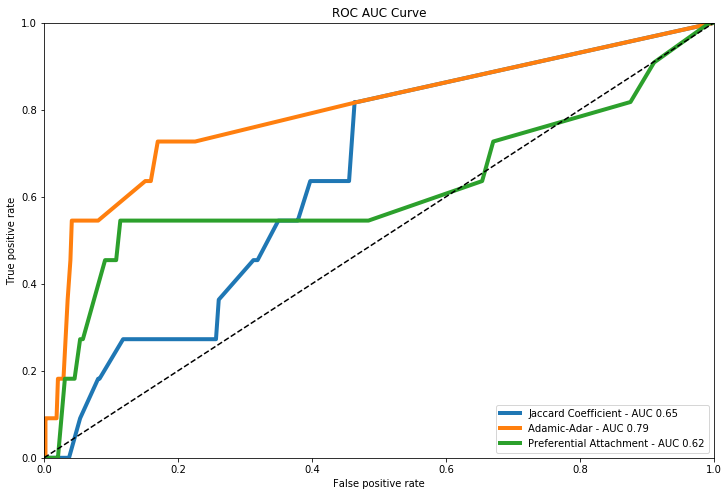

In [47]:
plt.figure(figsize=(12, 8))
plt.plot(fpr_jaccard, tpr_jaccard, label='Jaccard Coefficient - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot(fpr_adamic, tpr_adamic, label='Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=4)
plt.plot(fpr_pref, tpr_pref, label='Preferential Attachment - AUC %.2f' % auc_pref, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC AUC Curve")
plt.legend(loc='lower right')
plt.show()

## 2. Node Label Propagation

Now, let's work with some real world data from Facebook ! You can download the data right here :
https://snap.stanford.edu/data/egonets-Facebook.html

In [107]:
G_fb = nx.read_edgelist("facebook/414.edges")
n = G_fb.number_of_nodes()
m = G_fb.number_of_edges()

print("Number of nodes: %d" % n)
print("Number of edges: %d" % m)
print("Number of connected components: %d" % nx.number_connected_components(G_fb))

Number of nodes: 150
Number of edges: 1693
Number of connected components: 2


In [108]:
mapping=dict(zip(G_fb.nodes(), range(n)))
nx.relabel_nodes(G_fb, mapping, copy=False)
pos = nx.spring_layout(G_fb)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


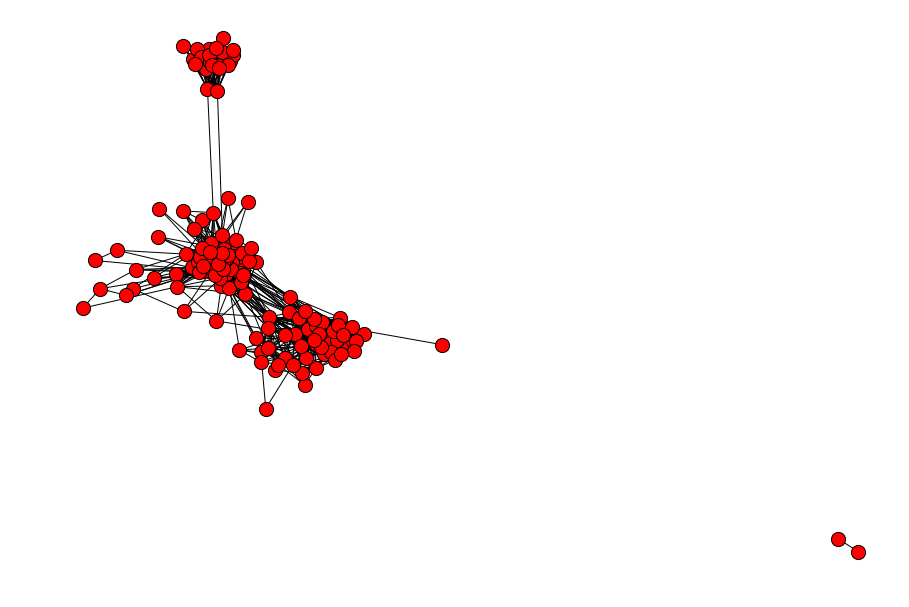

In [109]:
plt.figure(figsize=(12,8))
nx.draw(G_fb, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black

Among the features available, we are going to use the feature 43, that describes whether someone attended a given school or not. We have only 2 labels (1, in red, if attended and -1, in blue, otherwise).

In [114]:
with open('facebook/414.featnames') as f:
    for i, l in enumerate(f):
        pass

In [115]:
n_feat = i+1

features = np.zeros((n, n_feat))
f = open('facebook/414.feat', 'r')

for line in f:
    if line.split()[0] in mapping:
        node_id = mapping[line.split()[0]]
        features[node_id, :] = list(map(int, line.split()[1:]))

In [116]:
features = 2*features-1
feat_id = 43
labels = features[:, feat_id]

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


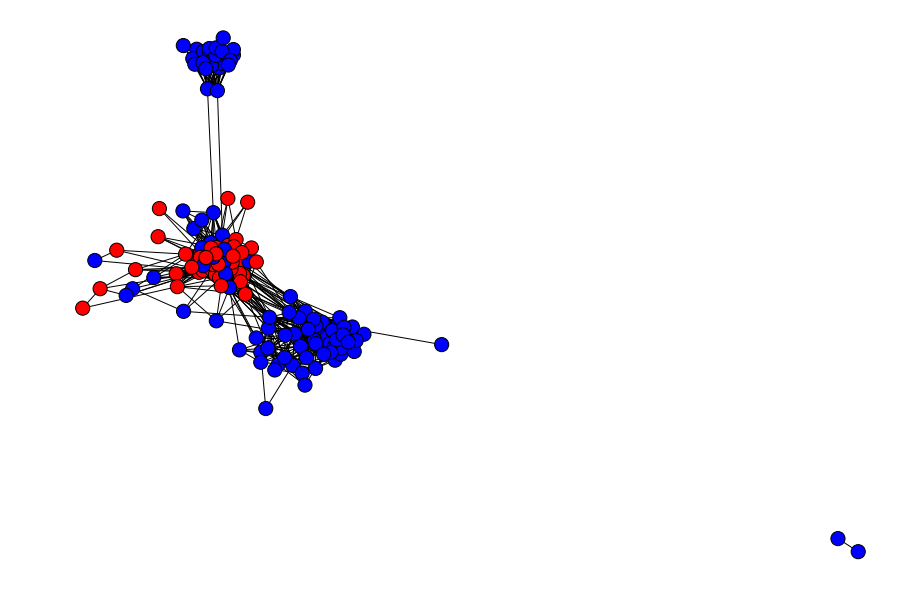

In [117]:
plt.figure(figsize=(12,8))
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black
plt.show()

This attribute is rather smooth on the graph, so propagation should work pretty well. To illustrate how node labeling works, we'll now delete some of the node labels. We'll keep only 30% of the nodes :

In [131]:
random.seed(5)
proportion_nodes = 0.3
labeled_nodes = random.sample(G_fb.nodes(), int(proportion_nodes * G_fb.number_of_nodes()))

In [132]:
known_labels = np.zeros(n)
known_labels[labeled_nodes] = labels[labeled_nodes]

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


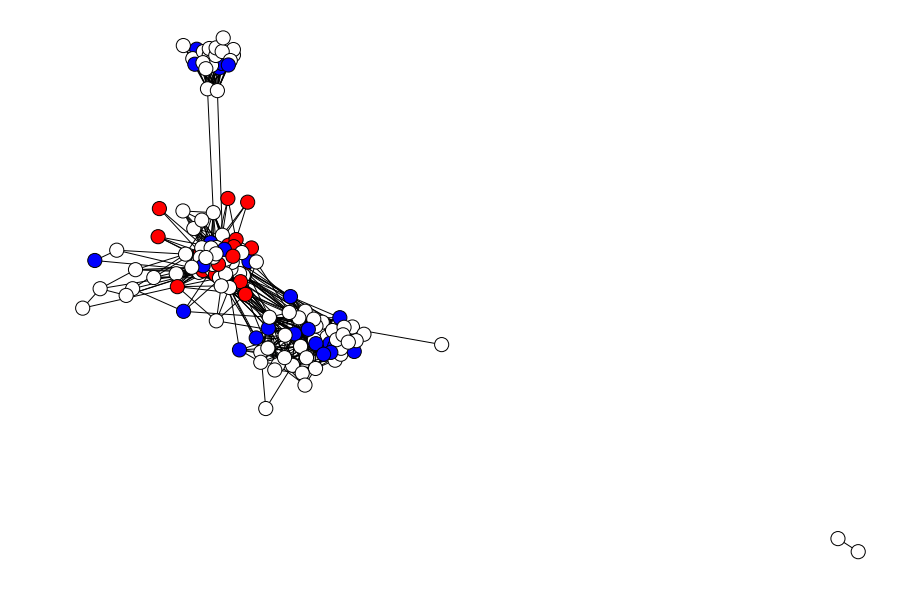

In [133]:
plt.figure(figsize=(12,8))
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = known_labels, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black
plt.show()

Let's now apply the label propagation :

In [134]:
alpha = 0.7
L_sym = nx.normalized_laplacian_matrix(G_fb)

In [135]:
Y = np.zeros((n,2))
Y[known_labels==-1, 0] = 1
Y[known_labels==1, 1] = 1
I = np.identity(n)

In [136]:
# Create the F-pred matrix
F_pred = np.linalg.inv(I*(1-alpha) + L_sym) * Y
# Identify the prediction as the argmax
pred = np.array(np.argmax(F_pred, axis=1)*2-1).flatten()
# Compute the accuracy score
succ_rate = accuracy_score(labels, pred)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


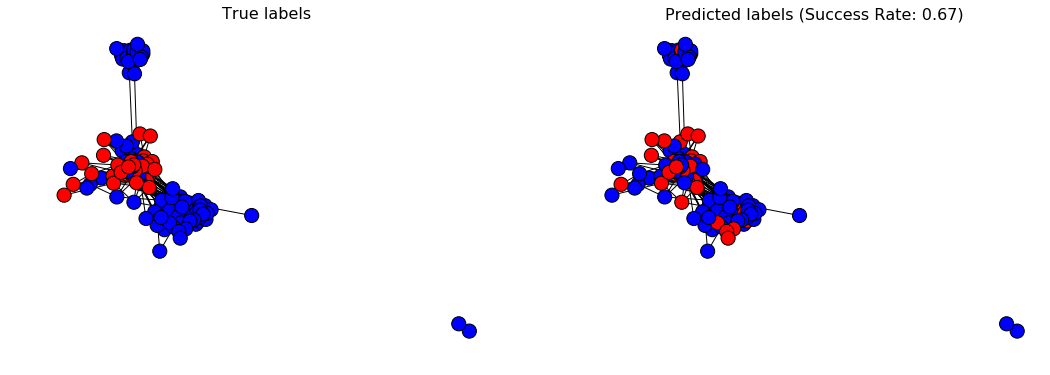

In [137]:
plt.figure(figsize=(18, 6))
f, axarr = plt.subplots(1, 2, num=1)

# Plot true values
plt.sca(axarr[0])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)
axarr[0].set_title('True labels', size=16)
plt.gca().collections[0].set_edgecolor("#000000")

# Plot predicted values
plt.sca(axarr[1])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = pred, node_size=200, pos=pos)
axarr[1].set_title('Predicted labels (Success Rate: %.2f)' % succ_rate, size=16)
plt.gca().collections[0].set_edgecolor("#000000")